                   Xleft  Xright  Fraction
0        0      4      3     NaN       NaN
1        4      8      0     NaN       NaN
2        8     12      1     NaN       NaN
3       12     16      0     NaN       NaN
4       16     20      0     NaN       NaN
5       20     24      9     NaN       NaN
6       24     28      0     NaN       NaN
7       28     32      5     NaN       NaN
8       32     36      1     NaN       NaN
9       36     40      2     NaN       NaN
10      40     44     19     NaN       NaN
11      44     48     29     NaN       NaN
12      48     52     45     NaN       NaN
13      52     56     41     NaN       NaN
14      56     60     38     NaN       NaN
15      60     64     30     NaN       NaN
16      64     68     19     NaN       NaN
17      68     72     16     NaN       NaN
18      72     76      9     NaN       NaN
19      76     80      9     NaN       NaN
20      80     84     10     NaN       NaN
21      84     88      2     NaN       NaN
22      88 

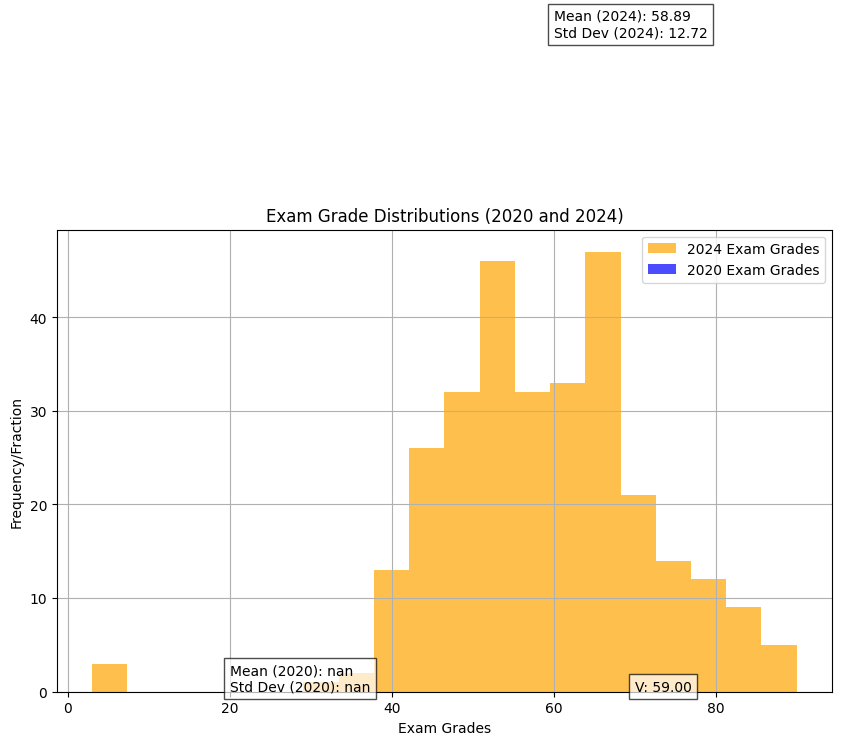

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Student ID number
student_id = 23001152  # Replace with your actual student ID number

# Load datasets based on the last digit of the student ID
last_digit = student_id % 10
dataset_2020 = f"2020input{last_digit}.csv"
dataset_2024 = f"2024input{last_digit}.csv"

# Read datasets
data_2020 = pd.read_csv(dataset_2020, names=['Xleft', 'Xright', 'Fraction'])

print(data_2020)

# Convert columns to numeric
data_2020[['Xleft', 'Xright', 'Fraction']] = data_2020[[
    'Xleft', 'Xright', 'Fraction']].apply(pd.to_numeric, errors='coerce')

print(data_2020)
# Read the 2024 dataset
data_2024 = pd.read_csv(dataset_2024, names=['Grade'])

# Create histograms
plt.figure(figsize=(10, 6))

# Histogram for 2020
plt.bar(data_2020['Xleft'], data_2020['Fraction'], width=data_2020['Xright'] - data_2020['Xleft'],
        alpha=0.7, label='2020 Exam Grades', color='blue')

# Histogram for 2024
plt.hist(data_2024['Grade'], bins=20, alpha=0.7,
         label='2024 Exam Grades', color='orange')

# Calculate mean values and standard deviations
mean_2020 = np.average(
    (data_2020['Xleft'] + data_2020['Xright']) / 2, weights=data_2020['Fraction'])
std_2020 = np.sqrt(np.average((data_2020[['Xleft', 'Xright']].mean(axis=1) - mean_2020)**2,
                              weights=data_2020['Fraction']))

mean_2024 = np.mean(data_2024['Grade'])
std_2024 = np.std(data_2024['Grade'])

# Print mean values and standard deviations on the plot
plt.text(20, 0.12, f'Mean (2020): {mean_2020:.2f}\nStd Dev (2020): {std_2020:.2f}',
         bbox=dict(facecolor='white', alpha=0.7))
plt.text(60, 70, f'Mean (2024): {mean_2024:.2f}\nStd Dev (2024): {std_2024:.2f}',
         bbox=dict(facecolor='white', alpha=0.7))

# Calculate 'V' values based on the last digit of the student ID
if last_digit in [0, 1, 5, 6]:
    v_value = np.sum(data_2020[data_2020['Xleft'] >= 50]['Fraction'])
else:
    v_value = np.percentile(data_2024['Grade'], 50)

# Print 'V' value on the plot
plt.text(70, 0.1, f'V: {v_value:.2f}', bbox=dict(facecolor='white', alpha=0.7))

# Set plot labels and title
plt.xlabel('Exam Grades')
plt.ylabel('Frequency/Fraction')
plt.title('Exam Grade Distributions (2020 and 2024)')
plt.legend()
plt.grid(True)

# Save the plot as a PNG image
plt.savefig(f'{student_id}.png')

# Display the plot
plt.show()